In [1]:
import tensorflow as tf 
import numpy as np 
from matplotlib import pyplot as plt 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input , Dense , Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### Make a Dataset

In [3]:
X_train = np.linspace(-1 , 1 , 20)
X_test = np.linspace(-1 , 1 , 20)

In [4]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  , 
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475, 
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,  
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,  
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

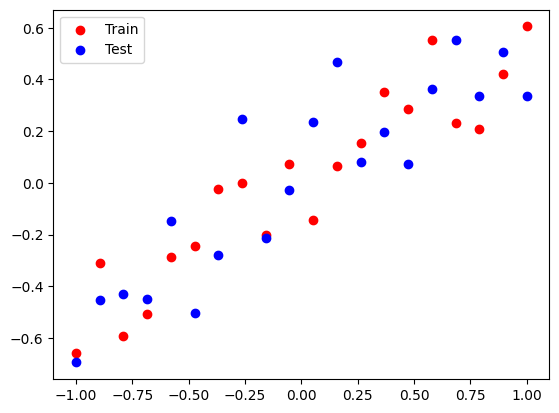

In [5]:
plt.scatter(x = X_train , y = y_train , c = 'red' , label = 'Train')
plt.scatter(x = X_test , y = y_test , c = 'blue' , label = 'Test')
plt.legend()
plt.show()

### Regression Model

In [20]:
model = Sequential()

model.add(Input(shape = (1 , ))) # adding the input layer
model.add(Dense(128 , activation = 'relu')) # hidden leyer-1
model.add(Dense(128 , activation = 'relu')) # hidden leyer-2
model.add(Dense(1 , activation = 'linear'))

adam = Adam(learning_rate = 0.01)
model.compile(loss = 'mse' , optimizer = adam , metrics = ['mse'])

# fit the model 
history = model.fit(X_train , y_train , validation_data = (X_test , y_test) , verbose = False , epochs = 500)

In [21]:
# evaluate the model 
_ , train_mse_loss = model.evaluate(X_train , y_train , verbose = False) # returns loss and metric value here both is mse value
_ , test_mse_loss = model.evaluate(X_test , y_test , verbose = False)

In [22]:
print(f"train mse loss: {train_mse_loss}")
print(f"test mse loss: {test_mse_loss}")

train mse loss: 0.003614481072872877
test mse loss: 0.04525246098637581


In [23]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


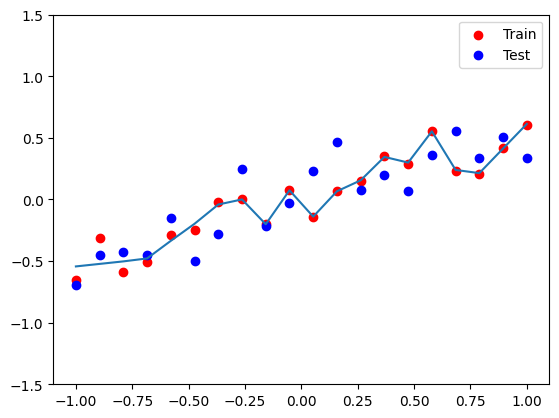

In [24]:
plt.figure()
plt.scatter(X_train , y_train , c = 'red' , label = 'Train')
plt.scatter(X_test , y_test , c = 'blue' , label = 'Test')

plt.plot(X_test , y_pred)
plt.legend()
plt.ylim((-1.5 , 1.5))
plt.show()

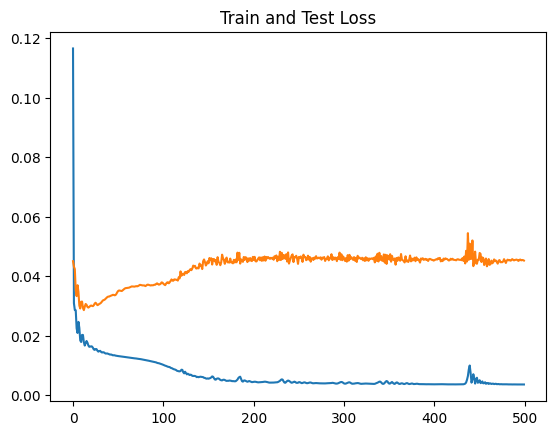

In [25]:
# loss curve of train and test 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Train and Test Loss")
plt.show()

### Drop out model

In [26]:
drop_out_model = Sequential()

drop_out_model.add(Input(shape = (1 , ))) # cause we have only one feature

drop_out_model.add(Dense(128 , activation = 'relu')) # hidden layer-1
drop_out_model.add(Dropout(rate = 0.2))

drop_out_model.add(Dense(128 , activation = 'relu')) # hidden layer-2
drop_out_model.add(Dropout(rate = 0.2))

drop_out_model.add(Dense(1 , activation = 'linear'))

In [27]:
drop_out_model.compile(loss = 'mse' , optimizer = Adam(learning_rate = 0.01) , metrics = ['mse'])

In [28]:
drop_out_model_history = drop_out_model.fit(X_train , y_train , validation_data = (X_test , y_test) , epochs = 500 , verbose = False)

In [29]:
drop_out_pred = drop_out_model.predict(X_test) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


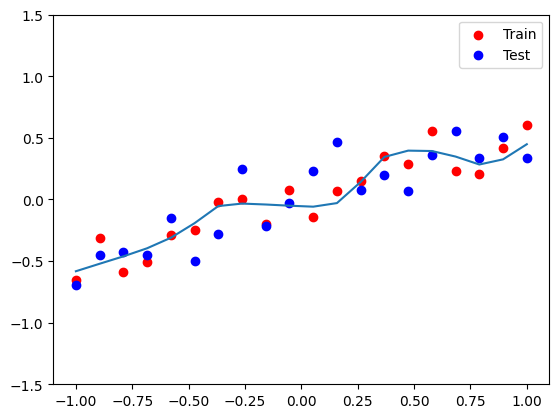

In [30]:
plt.figure()
plt.scatter(X_train , y_train , c = 'red' , label = 'Train')
plt.scatter(X_test , y_test , c = 'blue' , label = 'Test')

plt.plot(X_test , drop_out_pred)
plt.legend()
plt.ylim((-1.5 , 1.5))
plt.show()

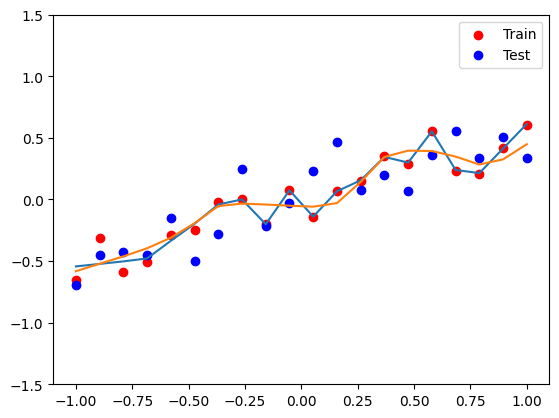

In [31]:
plt.figure()
plt.scatter(X_train , y_train , c = 'red' , label = 'Train')
plt.scatter(X_test , y_test , c = 'blue' , label = 'Test')

plt.plot(X_test , y_pred)
plt.plot(X_test , drop_out_pred)

plt.legend()
plt.ylim((-1.5 , 1.5))
plt.show()

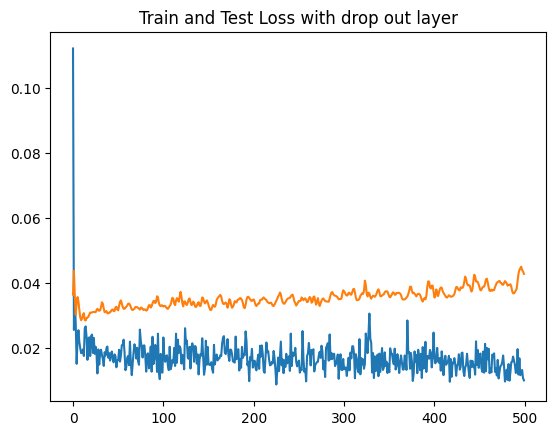

In [32]:
# loss curve of train and test 
plt.plot(drop_out_model_history.history['loss'])
plt.plot(drop_out_model_history .history['val_loss'])
plt.title("Train and Test Loss with drop out layer")
plt.show()